# IS 4487 Assignment 5: Exploratory Data Analysis (EDA) with Stakeholder Framing

In this assignment, you will:
- Load and explore a hotel bookings dataset
- Identify stakeholder needs and frame your analysis around business goals
- Practice data summarization and visualization
- Draw insights that could lead to actionable business recommendations

## Why This Matters

These skills are essential for business majors and minors working in areas like marketing, operations, finance, or consulting. Understanding how to explore and communicate data-driven insights helps you make better decisions and contribute to real-world business outcomes.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_05_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.


## 1. Setup and Data Loading

Instructions:
- Import `pandas`, `seaborn`, and `matplotlib.pyplot`.
- Load the dataset from this URL:
  https://github.com/Stan-Pugsley/is_4487_base/blob/d764a81fe649c397a1f5b35f1e1ceda48b5178d1/DataSets/hotels.csv?raw=true
- Display the first few rows to confirm it loaded correctly.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://github.com/Stan-Pugsley/is_4487_base/blob/d764a81fe649c397a1f5b35f1e1ceda48b5178d1/DataSets/hotels.csv?raw=true"
df = pd.read_csv(url)

df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2. Stakeholder and Business Context

Business framing:  

Every analysis should serve a decision-maker. Before you explore the data, identify who cares about hotel booking behavior and what they might want to know. Your analysis should be framed around those needs.

### In your markdown:
1. Who are the key stakeholders for this dataset?
2. What goals might each stakeholder have?
3. What is a clear, specific business problem statement that this data can help answer?





### ✍️ Your Response: 🔧
1. - Hotel managers (city and resort hotels)  
   - Marketing teams  
   - Operations and staff planning teams  
   - Hotel owners and investors  

2. - Managers: reduce cancellations, optimize room allocation, and improve guest satisfaction.  
   - Marketing: identify customer segments, increase direct bookings, and design effective promotions.  
   - Operations: forecast demand, allocate staff and resources efficiently across seasons.  
   - Owners/Investors: maximize revenue, compare city vs. resort performance, and support strategic growth decisions.

3. A clear problem this dataset can help answer is:  
   What factors most influence booking cancellations and guest behavior, and how can hotels use these insights to reduce cancellations, optimize marketing strategies, and increase revenue performance?




## 3. Explore Data Structure and Quality

Business framing:  

Before diving into analysis, analysts need to understand the shape and health of the data. Bad data leads to bad decisions.

- Perform the following 3 checks to see the data quality:
  - Summary the data (e.g., `.info()`, `.describe()`)
  - Find the number of Null values
  - Find the number of duplicate row checks
- Flag any issues you notice (e.g., missing values, formatting problems)

In [2]:
print("=== INFO ===")
df.info()

print("\n=== DESCRIBE ===")
df.describe(include="all")

print("\n=== NULL VALUES ===")
df.isnull().sum()

print("\n=== DUPLICATE ROWS ===")
print("Number of duplicates:", df.duplicated().sum())

=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  mea

### In your markdown:
1. What structural issues or problems did you find?
2. What actions would you recommend to clean or prepare this dataset for use?

### ✍️ Your Response: 🔧
1.  
- The dataset contains missing values in several columns (`children`, `company`, `agent`).  
- There are a large number of duplicate rows (31,994), which may bias the analysis if not addressed.  
- Some variables may need standardization or cleaning (e.g., categorical fields like `meal`, `market_segment`).  

2.
- Remove duplicate rows to avoid over-representing repeated bookings.  
- Handle missing values:  
     - For `children`, replace nulls with 0 (since most bookings don’t include children).  
     - For `company` and `agent`, either drop these columns (if not relevant) or keep them as “Unknown/Not provided”.  
- Standardize categorical variables for consistency (e.g., unify “BB” and “Bed & Breakfast”).  
- Check for outliers in numerical fields like `adr` (average daily rate).  




## 4. Univariate Analysis

Business framing:  

Hotels care about trends like average stay length, customer mix, and pricing. A good EDA starts with understanding single variables and their distribution.

- Select at least 3 individual variables to explore
- Use plots and summary methods (e.g. info(), describe(), etc)  to describe the distribution (hint: we are only looking at the values of one variable, so think of plots you've used in the past that DON'T compare 2 variables.)
- Focus on what matters from a business standpoint (e.g., pricing, cancellations, guest types)

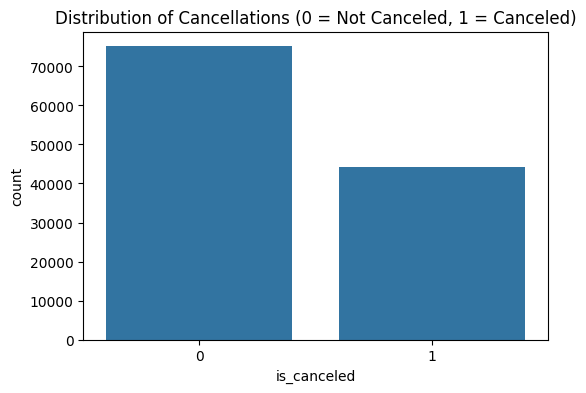

Cancellation counts:
is_canceled
0    62.958372
1    37.041628
Name: proportion, dtype: float64


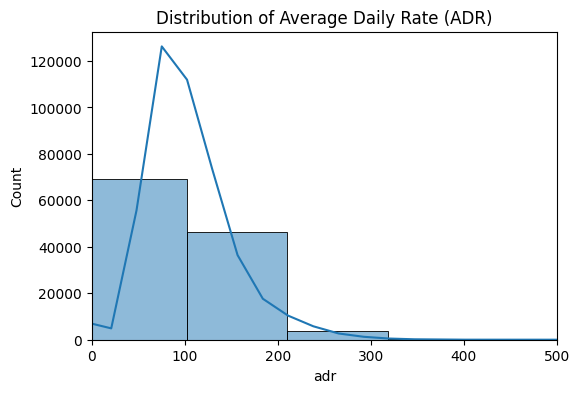

ADR Summary:
count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64


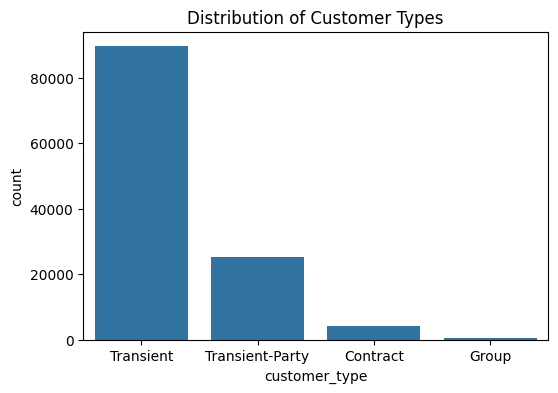

Customer Type counts:
customer_type
Transient          75.059050
Transient-Party    21.043638
Contract            3.414021
Group               0.483290
Name: proportion, dtype: float64


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="is_canceled", data=df)
plt.title("Distribution of Cancellations (0 = Not Canceled, 1 = Canceled)")
plt.show()

print("Cancellation counts:")
print(df["is_canceled"].value_counts(normalize=True)*100)

plt.figure(figsize=(6,4))
sns.histplot(df["adr"], bins=50, kde=True)
plt.title("Distribution of Average Daily Rate (ADR)")
plt.xlim(0, 500)
plt.show()

print("ADR Summary:")
print(df["adr"].describe())

plt.figure(figsize=(6,4))
sns.countplot(x="customer_type", data=df, order=df["customer_type"].value_counts().index)
plt.title("Distribution of Customer Types")
plt.show()

print("Customer Type counts:")
print(df["customer_type"].value_counts(normalize=True)*100)


### In your markdown:
1. Variable 1 – What did you explore and what did you find?
2. Variable 2 – What did you explore and what did you find?
3. Variable 3 – What did you explore and what did you find?

### ✍️ Your Response: 🔧
- Variable 1 – is_canceled (cancellations):  
  I explored the distribution of booking cancellations. About 37% of reservations were canceled.  
  This shows that cancellations are a major issue for hotels, as they directly impact occupancy and revenue planning.  

- Variable 2 – adr (Average Daily Rate):  
  I explored the distribution of the ADR. The average is about €101, with most values between €70 and €126.  
  There are outliers, including negative values and rates above €5,000, which likely indicate errors or rare special cases.  
  Overall, hotels are positioned in the mid-range market segment.  

- Variable 3 – customer_type:  
  I explored the distribution of customer types. Most guests (75%) are *Transient* (individual travelers), followed by *Transient-Party* (21%).  
  Contract customers represent only 3.4% and group bookings less than 1%.  
  This shows hotels rely mainly on individual guests rather than corporate or group clients.  


## 5. Bivariate Analysis

Business framing:  

Stakeholders often ask: “What drives cancellations?” or “Do longer stays mean higher revenue?” Bivariate analysis helps you uncover those kinds of relationships.

- Choose 2 relevant variable pairs (e.g., `lead_time` vs. `is_canceled`, or `adr` vs. `customer_type`)
- Use scatterplots, grouped bar plots, or boxplots to explore the relationships
- Interpret what these relationships could mean for the hotel business

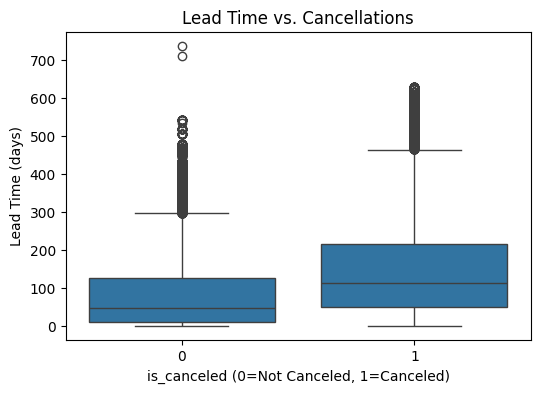

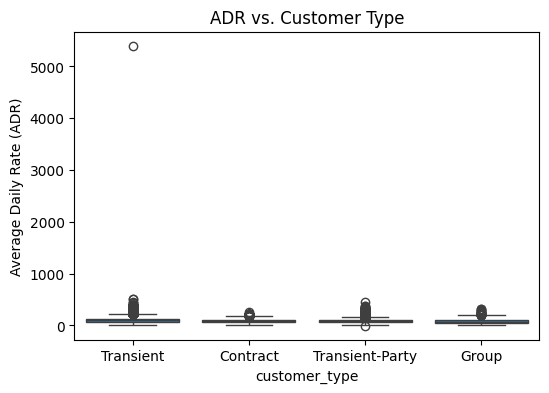

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x="is_canceled", y="lead_time", data=df)
plt.title("Lead Time vs. Cancellations")
plt.xlabel("is_canceled (0=Not Canceled, 1=Canceled)")
plt.ylabel("Lead Time (days)")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="customer_type", y="adr", data=df)
plt.title("ADR vs. Customer Type")
plt.ylabel("Average Daily Rate (ADR)")
plt.show()


### In your markdown:
1. Relationship 1 – What did you analyze and what insights did you find?
2. Relationship 2 – What did you analyze and what insights did you find?

### ✍️ Your Response: 🔧
- Relationship 1 – lead_time vs is_canceled:  
  I analyzed the relationship between lead time and cancellations.  
  The results show that bookings with longer lead times are more likely to be canceled.  
  This suggests that customers booking far in advance are less committed, which could help hotels design policies like stricter cancellation rules for long lead-time bookings.  

- Relationship 2 – adr vs customer_type:  
  I analyzed how average daily rate varies across customer types.  
  Transient customers have a wide range of ADR values, while contract customers tend to have lower and more stable rates.  
  This indicates that corporate/contract bookings bring less revenue per night but provide stability, while individual travelers contribute higher but more volatile revenue.  


## 6. Problem Complexity and Analytics Framing

Business framing:  

Let’s say you found a strong trend — maybe high lead times predict cancellations, or certain channels bring repeat guests. What kind of problem is this?

- Choose one insight from your earlier analysis
- Reflect on:
  - What type of complexity this problem represents (e.g., variety, volume, variability)
  - What kind of analytics would help solve or explain it (descriptive, diagnostic, predictive, prescriptive)

### In your markdown:
1. What was your selected insight?
2. What kind of complexity does it involve?
3. What type of analytics would help, and why?



### ✍️ Your Response: 🔧
1. Selected Insight:  
   Bookings with longer lead times are more likely to be canceled. This indicates a strong relationship between how far in advance a reservation is made and the likelihood of cancellation.  

2. Type of Complexity:  
   This problem involves variability, since cancellation likelihood changes significantly depending on booking lead time. It also involves volume, because there are thousands of bookings to analyze, and trends emerge only with large datasets.  

3. Type of Analytics:  
   Predictive analytics would be most useful here. By building models that predict the probability of cancellation based on lead time (and possibly other factors such as booking channel or customer type), hotels could better forecast occupancy, apply stricter cancellation policies for long lead-time bookings, or design targeted retention strategies.  


## 7. Final Takeaways and Recommendations

Business framing:  

Imagine you’re preparing for a stakeholder meeting. What would you highlight from your findings?

- Identify your top 2–3 insights or patterns
- Connect each to a stakeholder need or business goal
- Make one recommendation based on the analysis

### In your markdown:
1. What patterns or trends stood out?
2. How do they connect to stakeholder goals?
3. What recommendation would you make based on this analysis?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. Patterns or trends that stood out:  
   - About 37% of bookings were canceled, showing cancellations are a significant business challenge.  
   - Bookings with longer lead times are more likely to be canceled, indicating variability in guest commitment.  
   - Most guests are *Transient* (individual travelers), and they generate higher but more volatile ADR compared to contract or group customers.  

2. Connection to stakeholder goals:  
   - Hotel managers want to reduce cancellations and improve occupancy forecasting.  
   - Marketing teams want to understand customer types and booking behavior to design better campaigns.  
   - Owners/investors want to maximize revenue and balance stability (contracts) with profitability (transient guests).  

3. Recommendation:  
   Hotels should implement stricter cancellation policies or require deposits for long lead-time bookings, while continuing to target individual travelers with flexible but profitable offers. This balances stability and revenue optimization.  

4. Connection to customized learning outcome:  
   This analysis reflects my goal of applying data analysis to real business decisions. By exploring patterns and framing recommendations, I practiced transforming raw data into actionable insights that support stakeholder decision-making.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas


In [5]:
!jupyter nbconvert --to html "assignment_05_FajardoPatrick.ipynb"

[NbConvertApp] Converting notebook assignment_05_FajardoPatrick.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 469263 bytes to assignment_05_FajardoPatrick.html
